In [1]:
# FEM package
import fenics as fn
# "Numerical" package
import numpy as np
# Graphic package
from matplotlib import pyplot as plt
# Sparse matrix package
from scipy import sparse as sp
# sparse linear solver (for some reason I cannot call it directly from sp)
from scipy.sparse import linalg as splg 

Problem: Find $u\in \mathbb{U}_n$ such that:
$$-\varepsilon \Delta u + c u = f $$
$$u(0) = u(1) = 0$$

**Equation's paremeters**

In [2]:
# Diffusion's coefficient
eps = .01
# Reaction's coefficient
c = 1.
# Boundary conditions
g = fn.Constant(0.)
# RHS
f = fn.Constant(1.)

**Mesh definition**

In [3]:
# Number of elements
Ne = 18
# Mesh definition
mesh = fn.IntervalMesh(Ne,0,1)

**Mesh plot**

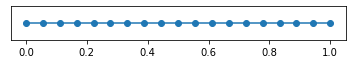

In [4]:
fn.plot(mesh)
plt.show()

**FE space**

In [5]:
Un = fn.FunctionSpace(mesh,'CG',1)

**Boundary conditions**

In [6]:
bc_n = fn.DirichletBC (Un, g, 'on_boundary')

**Trial and test function**

In [7]:
# Trial
un = fn.TrialFunction(Un)
# Test
wn = fn.TestFunction(Un)

**Variational formulation**
$$b(u_n,v_n) := \varepsilon\int_{0}^{1} \nabla u_n \cdot \nabla v_n + c\int_{0}^{1} u_n v_n = \int_{0}^{1} f v_n =: \ell(v_n)$$

In [8]:
bilinear_form = fn.Constant(eps)*fn.dot(fn.grad(un),fn.grad(wn))*(fn.dx) + fn.Constant(c)*(un*wn)*(fn.dx)
linear_rhs = f*wn*(fn.dx)

**Matrices assemble**

In [9]:
A_dolfin, b_dolfin = fn.assemble_system(bilinear_form,linear_rhs,bc_n)

**Converting to numpy arrays**

In [10]:
A_numpy = fn.as_backend_type(A_dolfin).mat()[:,:]
b_numpy = b_dolfin[:]

**Solving linear system**

In [11]:
# Defining the discrete solution
un_sol1 = fn.Function(Un)
# Solving the FEM linear system
vec = np.linalg.solve(A_numpy,b_dolfin)
#
un_sol1.vector()[:] = vec

**Solution plot**

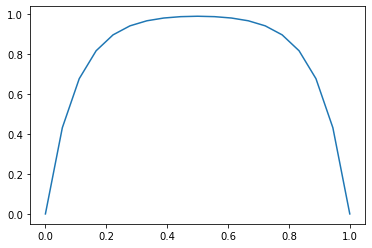

coefficient's solution: [0.         0.43043047 0.67553463 0.81506437 0.89441984 0.93942167
 0.96471255 0.9785216  0.98534203 0.98739305 0.98534203 0.9785216
 0.96471255 0.93942167 0.89441984 0.81506437 0.67553463 0.43043047
 0.        ]


In [12]:
fn.plot(un_sol1)
plt.show()
print('coefficient\'s solution:',un_sol1.vector()[:])

**Sparse version**

In [13]:
A_sparse = sp.csr_matrix(A_numpy) # can I do this better? without passing for a dense matrix?

In [14]:
# Defining the discrete solution
un_sol2 = fn.Function(Un)
# Solving the FEM linear system
vec = splg.spsolve(A_sparse,b_dolfin)
#
un_sol2.vector()[:] = vec

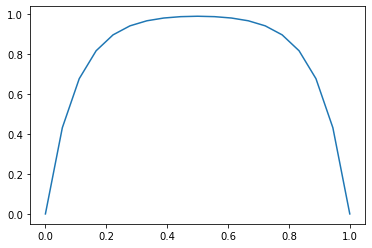

coefficient's solution: [0.         0.43043047 0.67553463 0.81506437 0.89441984 0.93942167
 0.96471255 0.9785216  0.98534203 0.98739305 0.98534203 0.9785216
 0.96471255 0.93942167 0.89441984 0.81506437 0.67553463 0.43043047
 0.        ]


In [15]:
fn.plot(un_sol2)
plt.show()
print('coefficient\'s solution:',un_sol2.vector()[:])